# Proof of Concept: Archi to Neo4j to App

## Background

I often use Archi for my daily work. During my research I came across the following article: https://medium.com/geekculture/using-a-graph-database-to-explore-your-archimate-model-df7bd63f65dd. The aim of this PoC is to reconstruct the described procedure and to solve a use case with it.

## Setting the Stage

### The Archi Model

As a basis, I have created an exemplary reference model with Archi, which containts simplified elements of APQC'S PROCESS CLASSIFICATION FRAMEWORK® CROSS-INDUSTRY.

*Reference: https://www.apqc.org/resource-library/resource-listing/apqc-process-classification-framework-pcf-cross-industry-pdf-12*

I have exported this model as a CSV (/archi-csv/ReferenceModel_APQC_PFC). I have also copied the files for ArchIsurance from https://github.com/lju-lazarevic/misc/tree/main/archi to (/archi-csv/ArchIsurance)

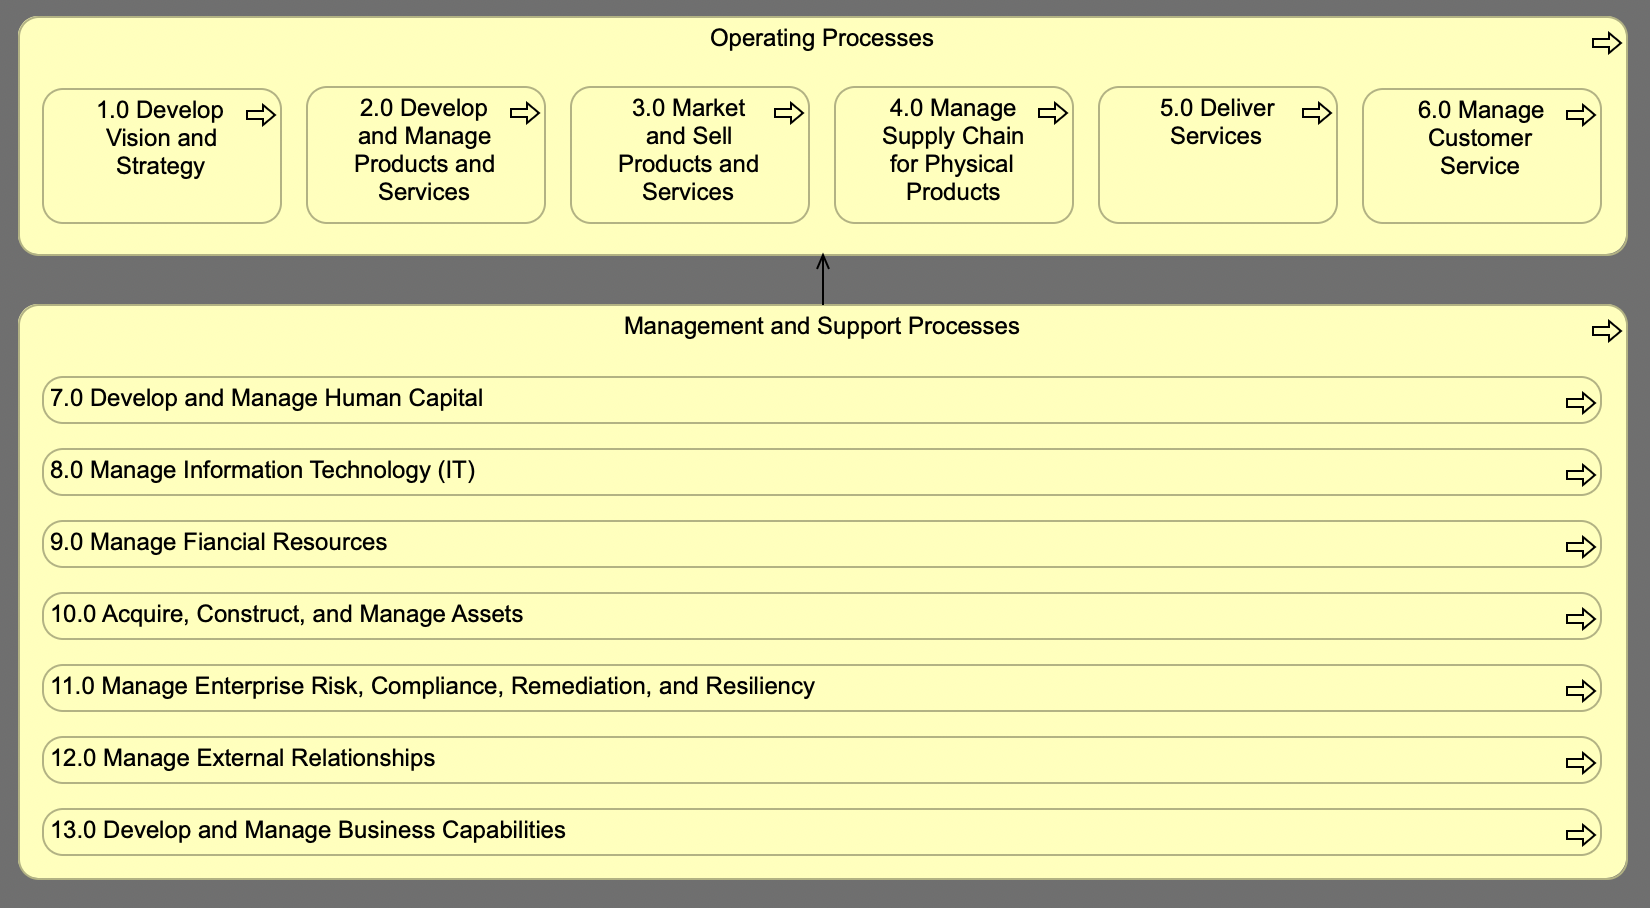

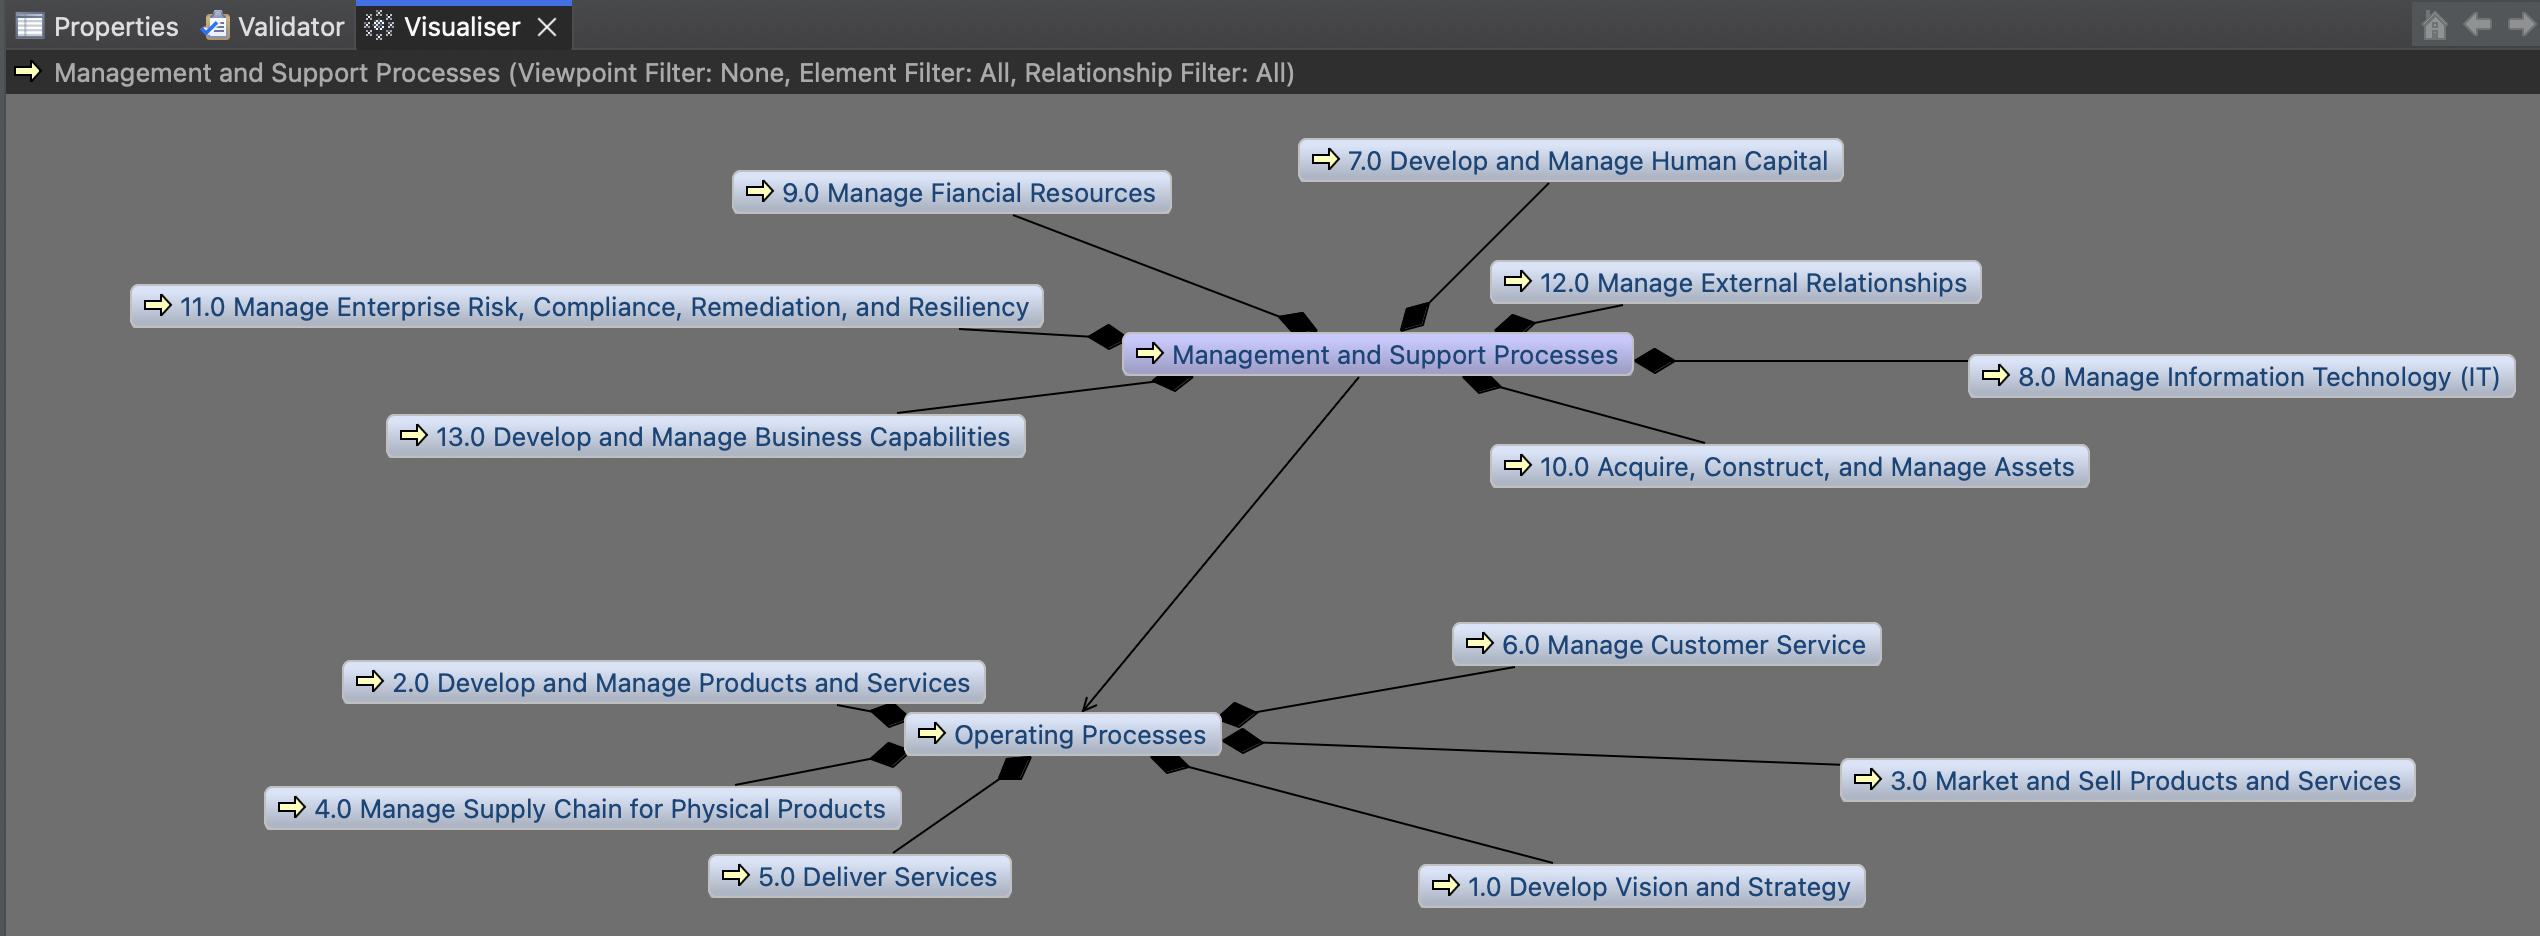

### Sandbox Neo4j (online)

I have created an account for https://neo4j.com/sandbox.



**Load the elements data:**
```
LOAD CSV WITH HEADERS FROM 'https://raw.githubusercontent.com/blog-fl/poc-archi-to-neo4j-to-app/refs/heads/main/archi-csv/ReferenceModel_APQC_PFC/elements.csv' AS line
CREATE (:elements {class:line.Type, name:line.Name, documentation:line.Documentation, id:line.ID })
```
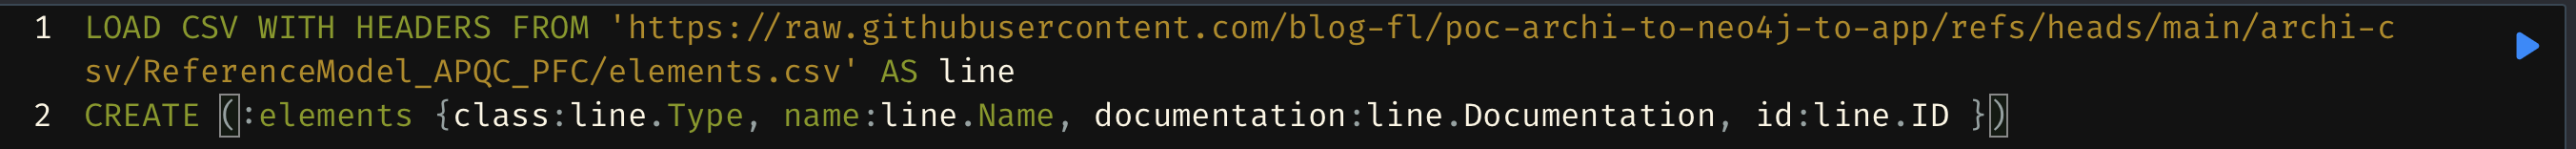

**Load relations info:**
```
LOAD CSV WITH HEADERS FROM 'https://raw.githubusercontent.com/blog-fl/poc-archi-to-neo4j-to-app/refs/heads/main/archi-csv/ReferenceModel_APQC_PFC/relations.csv' AS line
MATCH (n {id:line.Source})
WITH n, line
MATCH (m {id:line.Target})
WITH n, m, line
CREATE (n)-[:relationships {id:line.ID, class:line.Type, documentation:line.Documentation,
    name:line.Name}]->(m)
```

**Show results:**
```
MATCH (n) RETURN n LIMIT 500
```

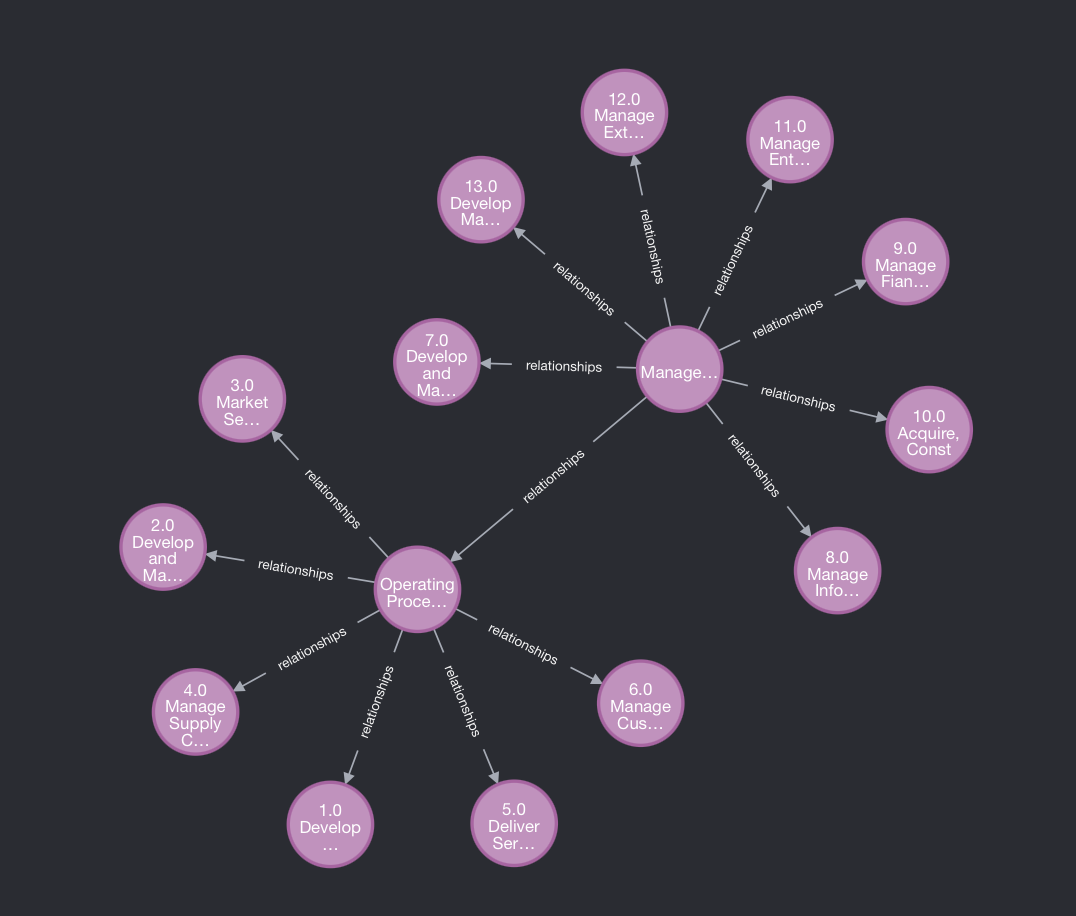

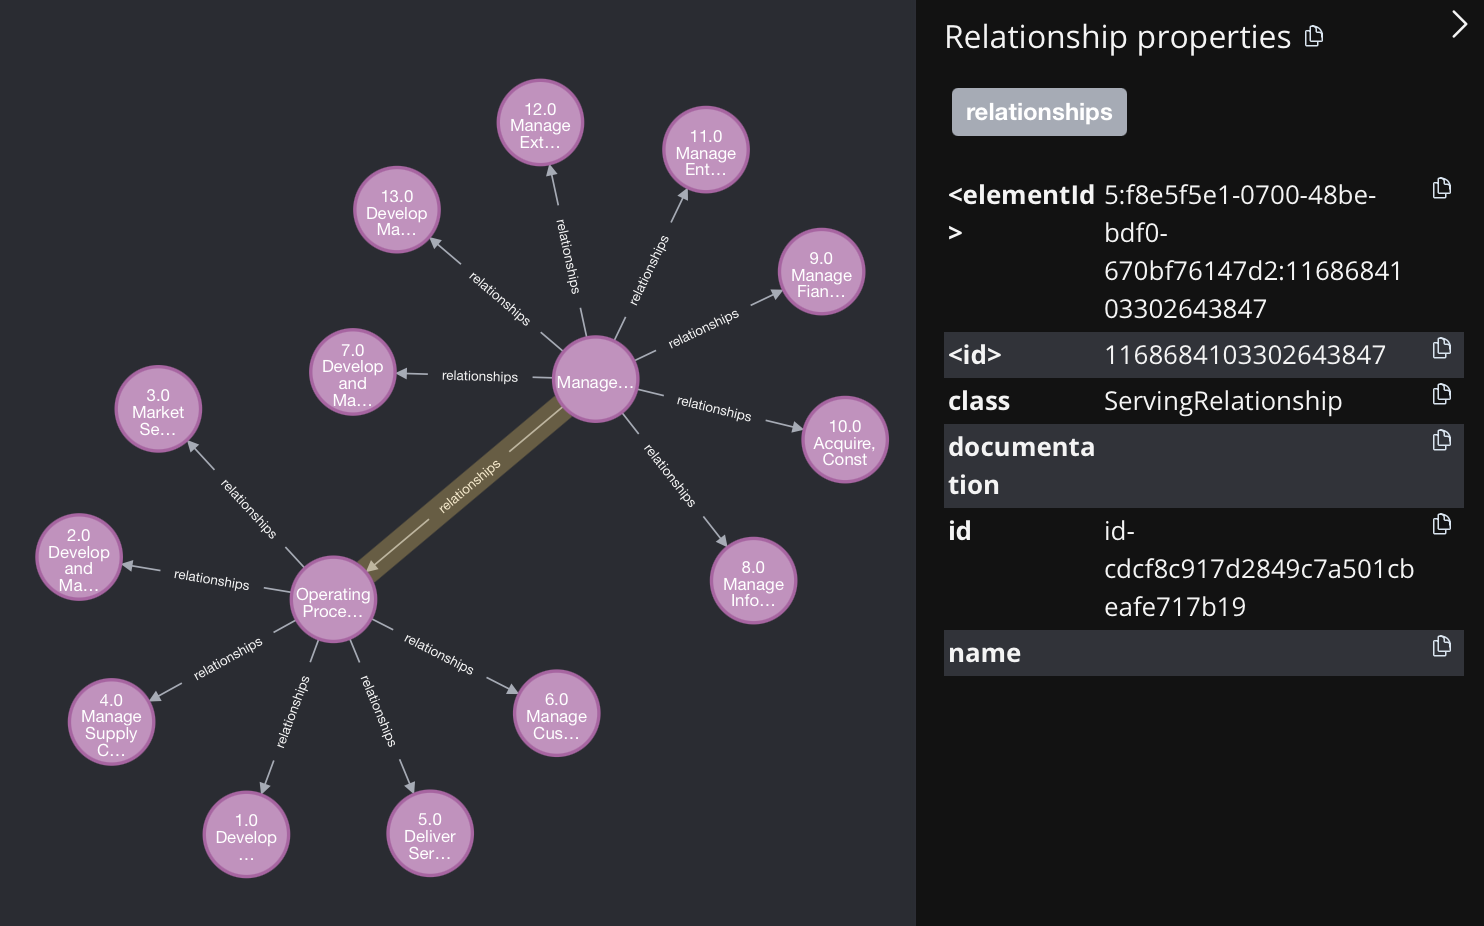

**A few queries:**
```
CALL db.labels()
```
Result: "elements"

```
CALL db.relationshipTypes()
```
Result: "relationships"

```
CALL db.propertyKeys()
```
Result:
"documentation"
"name"
"id"
"class"

```
MATCH (n {class: "BusinessProcess"})
RETURN count(n) AS CountBusinessProzesse
```
Result: 24

```
MATCH (n {class: "BusinessProcess"}) RETURN n
```
Result:
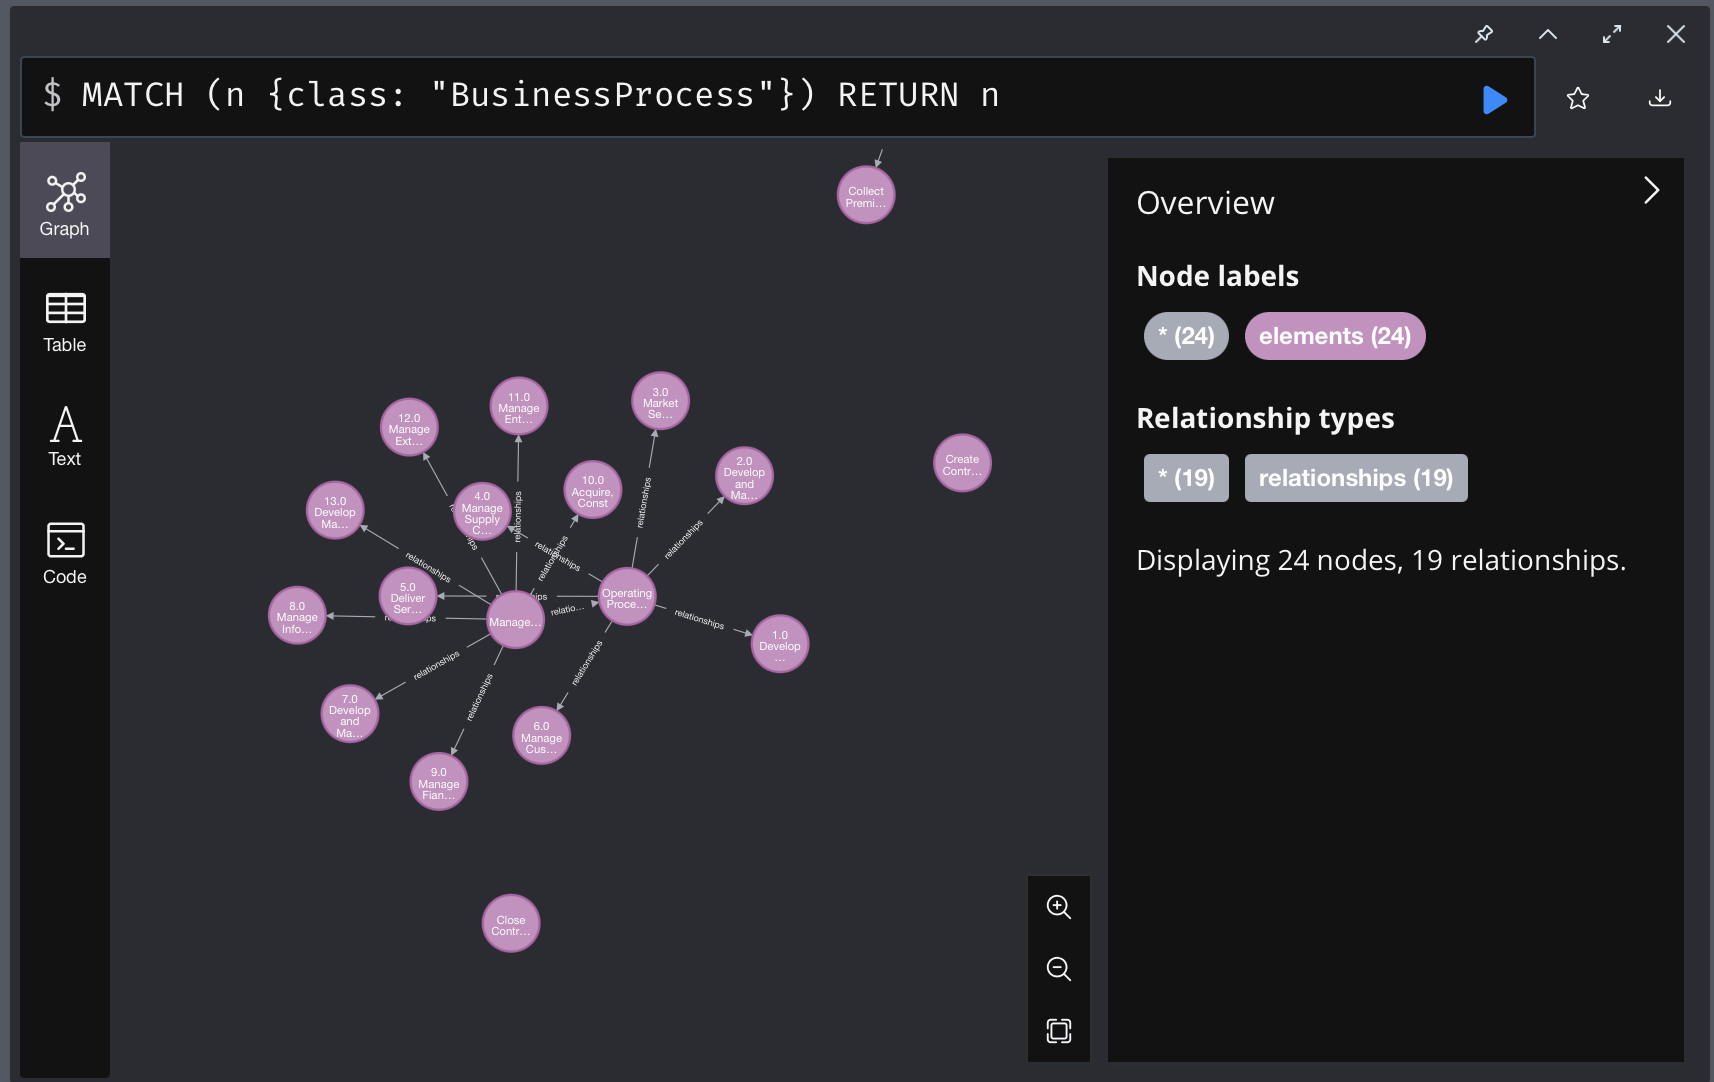

### Neo4j Aura (free)

In this scenario, i have only imported the example set of ArchInsurance:

**Load the elements data:**
```
LOAD CSV WITH HEADERS FROM 'https://raw.githubusercontent.com/blog-fl/poc-archi-to-neo4j-to-app/refs/heads/main/archi-csv/ArchIsurance/elements.csv' AS line
CREATE (:elements {class:line.Type, name:line.Name, documentation:line.Documentation, id:line.ID })
```
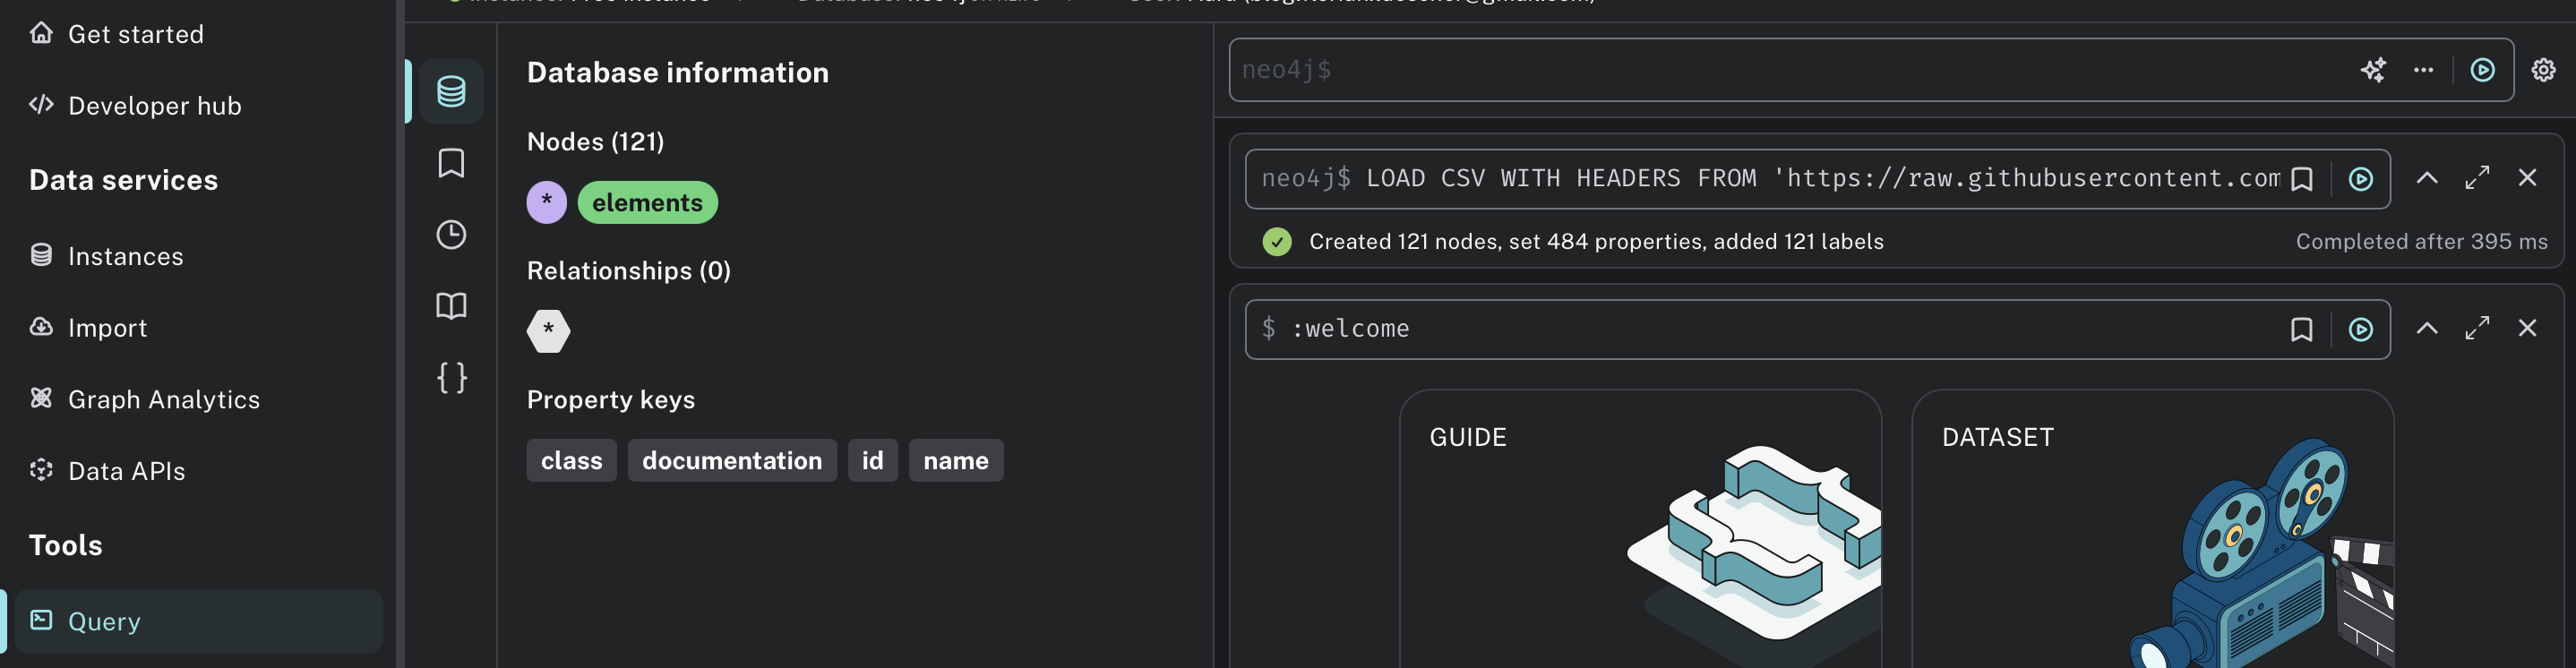

**Load relations info:**
```
LOAD CSV WITH HEADERS FROM 'https://raw.githubusercontent.com/blog-fl/poc-archi-to-neo4j-to-app/refs/heads/main/archi-csv/ArchIsurance/relations.csv' AS line
MATCH (n {id:line.Source})
WITH n, line
MATCH (m {id:line.Target})
WITH n, m, line
CREATE (n)-[:relationships {id:line.ID, class:line.Type, documentation:line.Documentation,
    name:line.Name}]->(m)
```
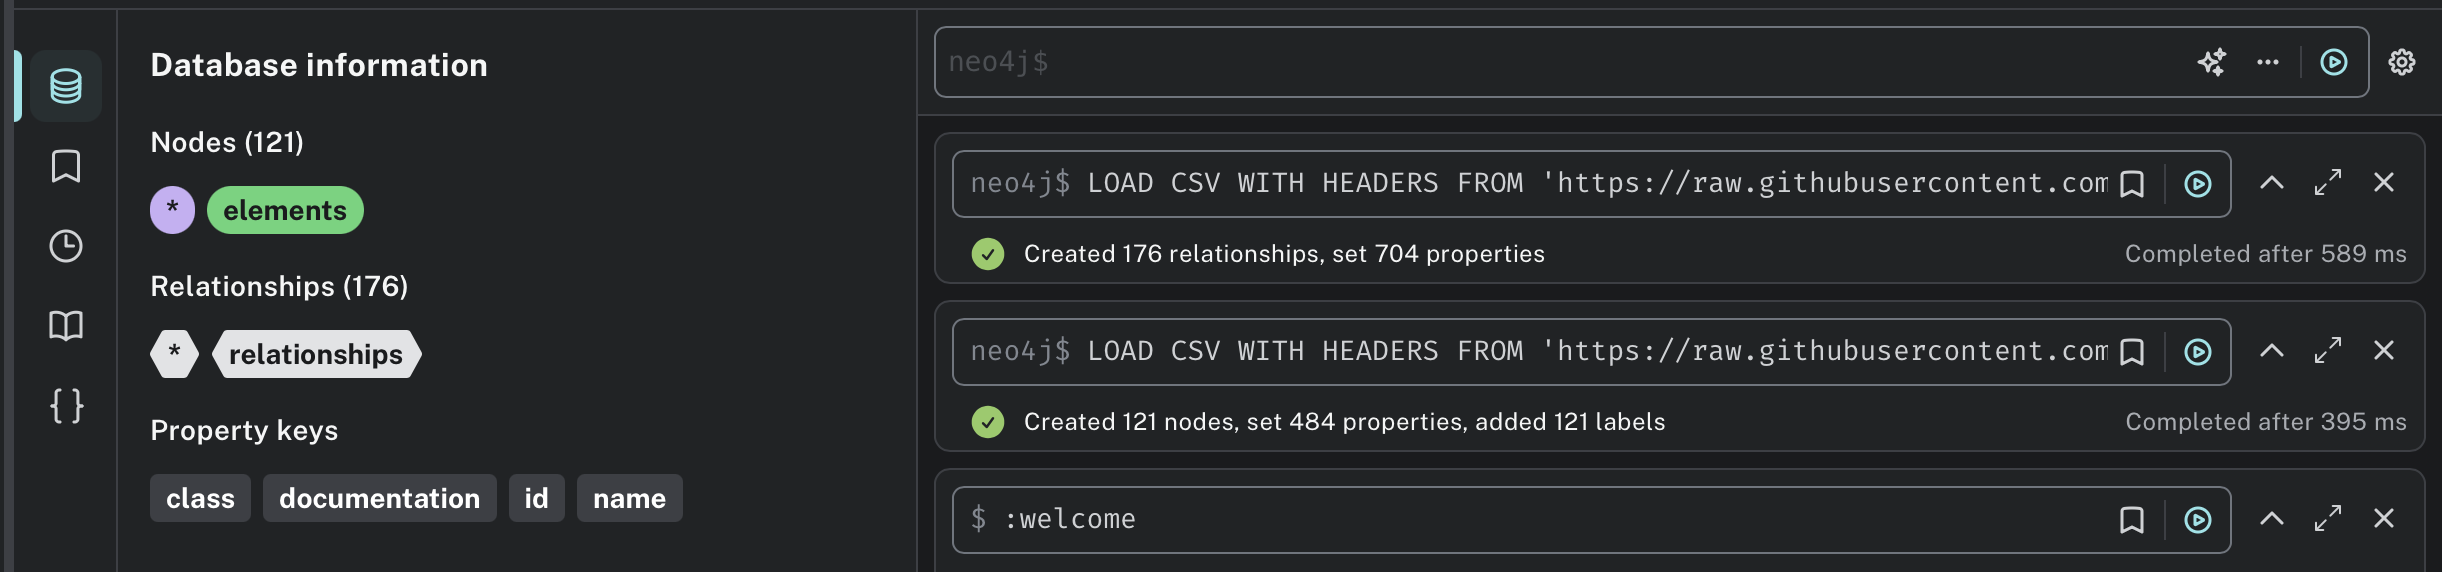

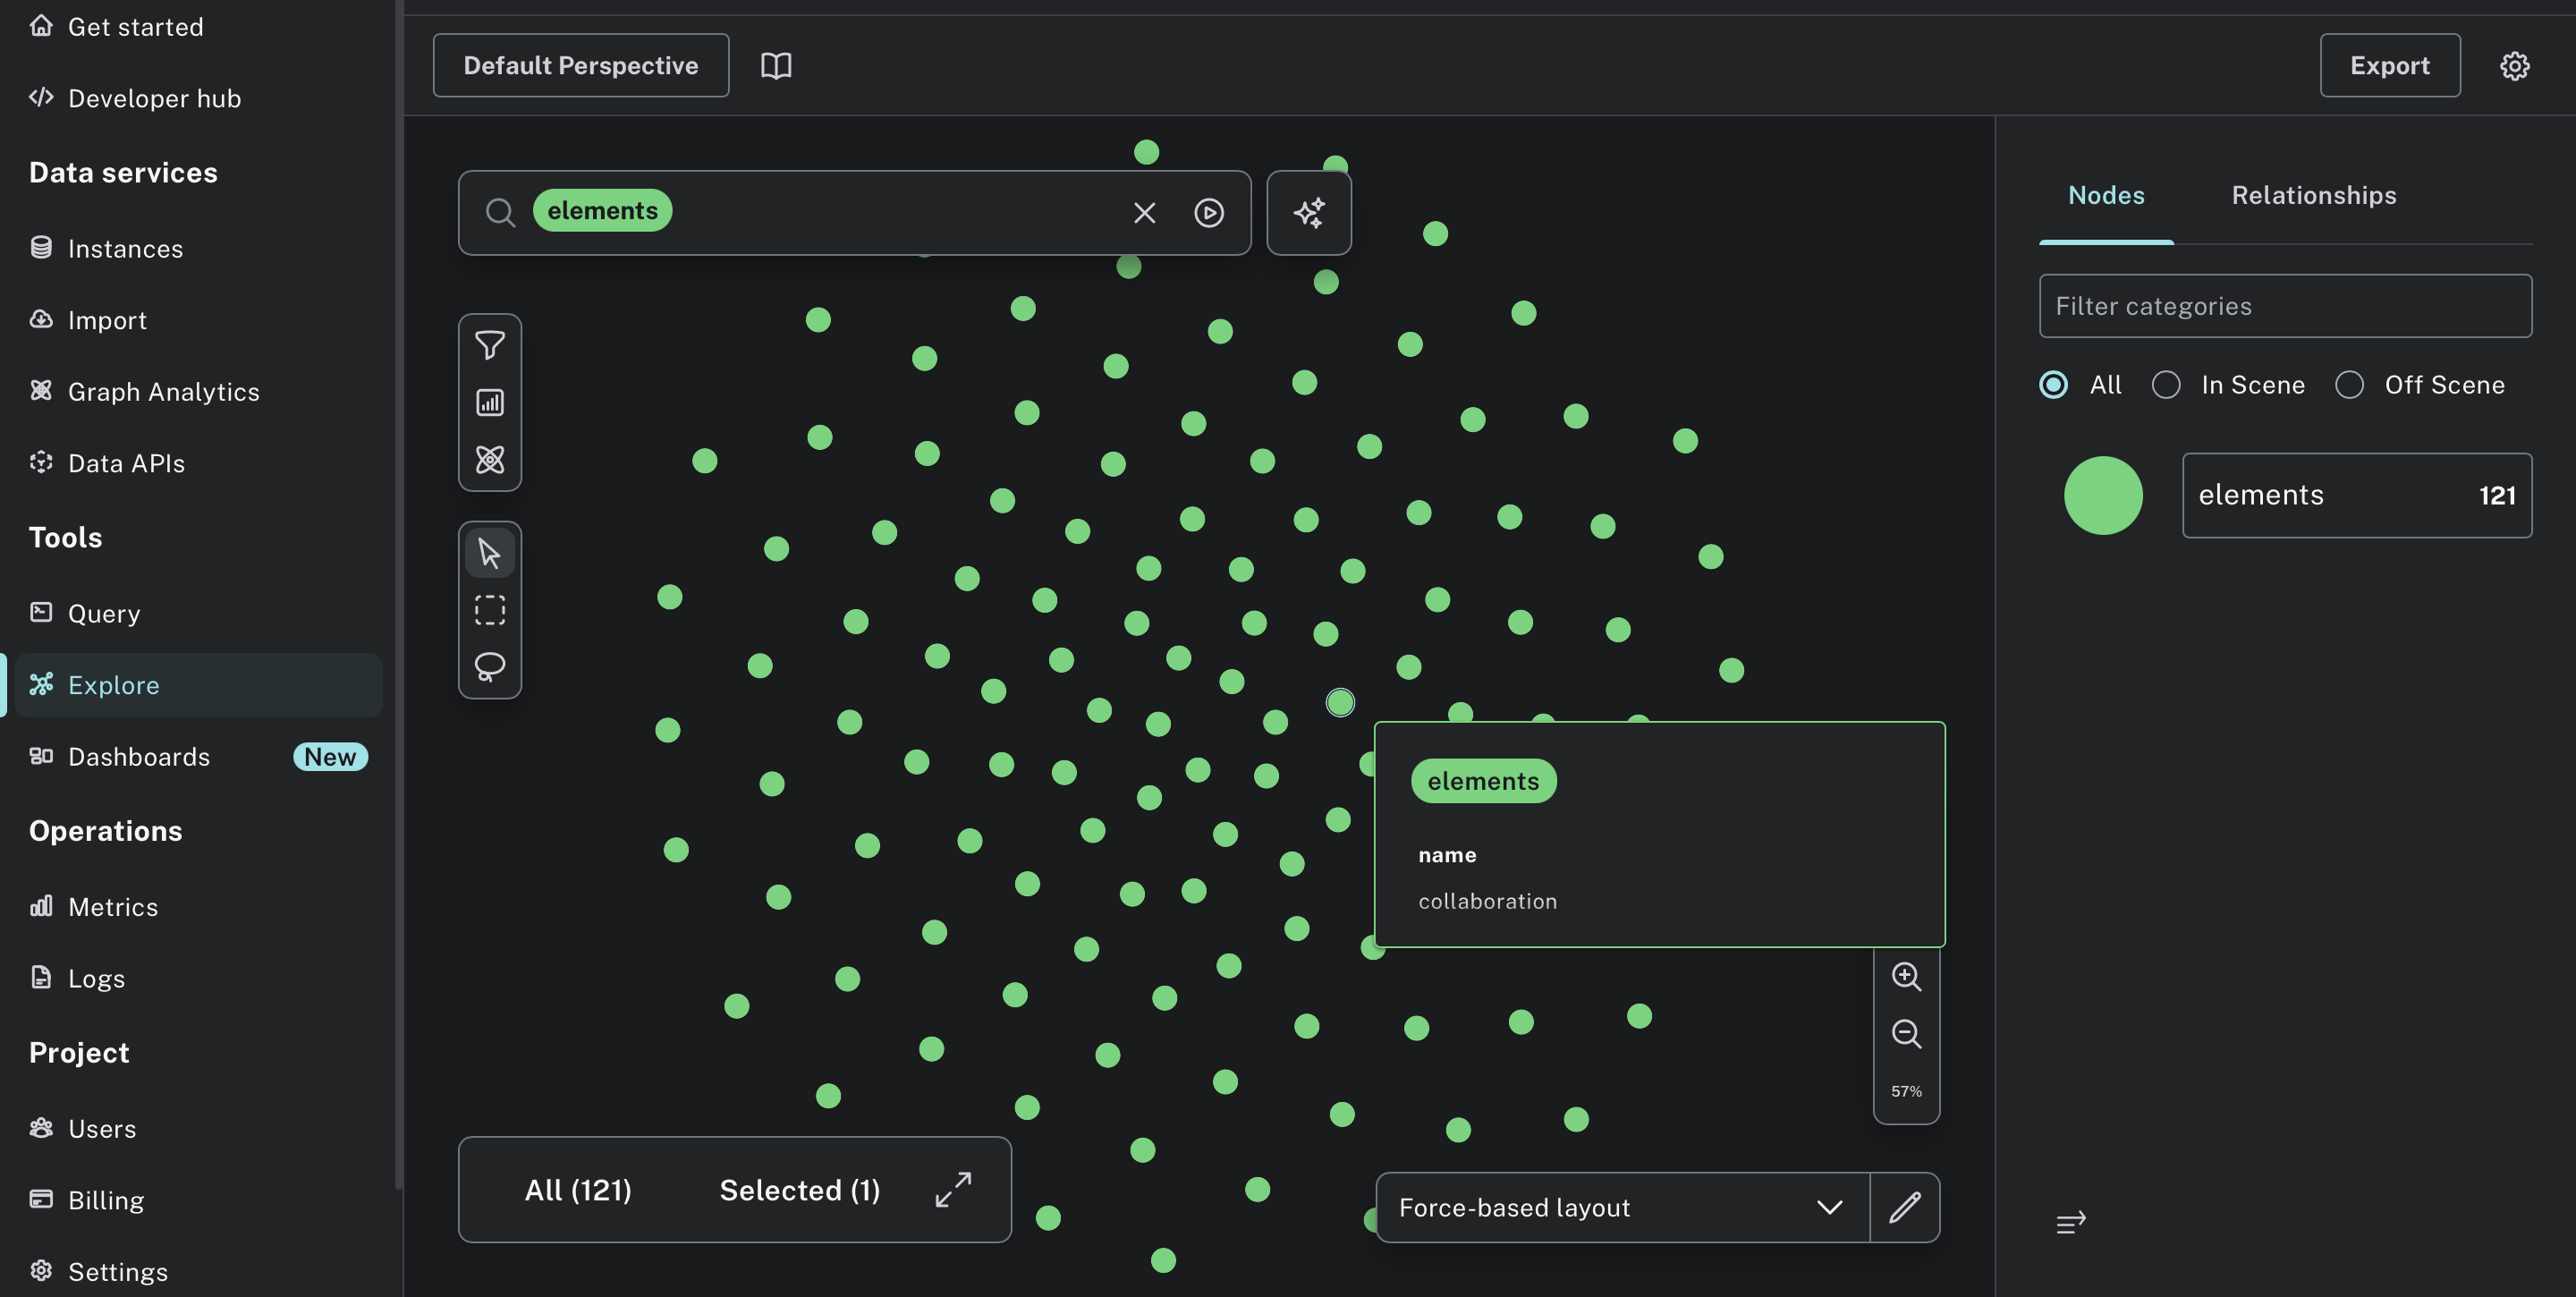

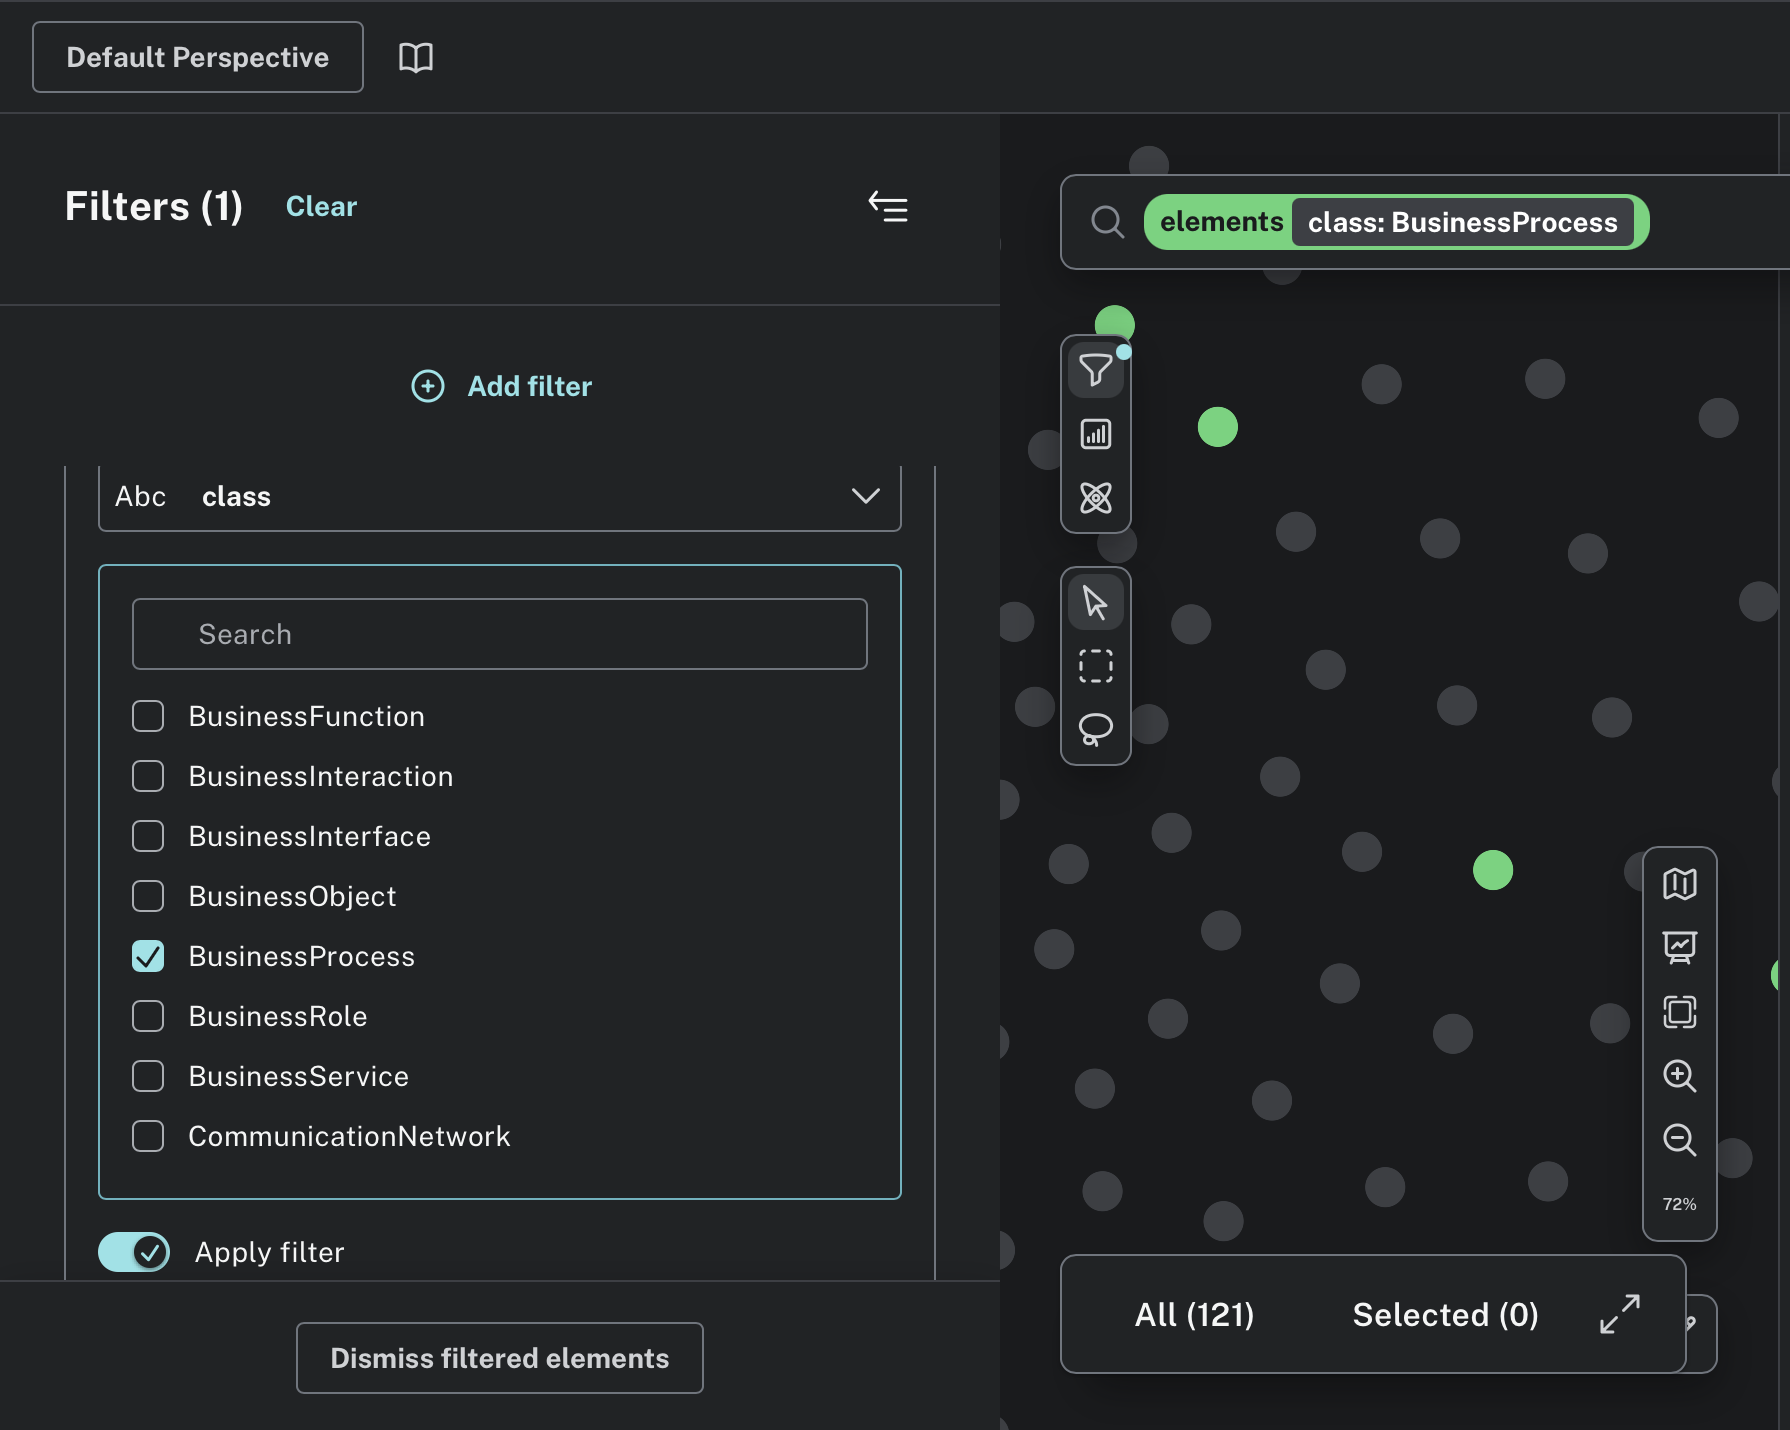


In [ ]:
!pip install neo4j
!pip install dotenv

In [3]:
from neo4j import GraphDatabase
import os
from dotenv import load_dotenv, find_dotenv

# retrieve env variables from in env-file

def load_env():
    _ = load_dotenv(find_dotenv())

load_env()

URI = os.getenv("neo4j-db-uri")
AUTH = (os.getenv("neo4j-db-user"), os.getenv("neo4j-db-password"))

In [4]:
with GraphDatabase.driver(URI, auth=AUTH) as driver:
    driver.verify_connectivity()


**Query a graph** 
To retrieve information from the database, use the Cypher clause MATCH:

In [6]:
records, summary, keys = driver.execute_query("""
    MATCH (n {class: "BusinessProcess"}) 
    RETURN n
    """,
    database_="neo4j",
)

# Loop through results and do something with them
for record in records:
    print(record.data())  # obtain record as dict

# Summary information
print("The query `{query}` returned {records_count} records in {time} ms.".format(
    query=summary.query, records_count=len(records),
    time=summary.result_available_after
))

{'n': {'documentation': '', 'name': 'Accept', 'id': '572', 'class': 'BusinessProcess'}}
{'n': {'documentation': '', 'name': 'Close Contract', 'id': '596', 'class': 'BusinessProcess'}}
{'n': {'documentation': '', 'name': 'Collect Premium', 'id': '1311', 'class': 'BusinessProcess'}}
{'n': {'documentation': '', 'name': 'Create Contract', 'id': '612', 'class': 'BusinessProcess'}}
{'n': {'documentation': '', 'name': 'Handle Claim', 'id': '556', 'class': 'BusinessProcess'}}
{'n': {'documentation': '', 'name': 'Inform Customer', 'id': '1302', 'class': 'BusinessProcess'}}
{'n': {'documentation': '', 'name': 'Pay', 'id': '588', 'class': 'BusinessProcess'}}
{'n': {'documentation': '', 'name': 'Register', 'id': '564', 'class': 'BusinessProcess'}}
{'n': {'documentation': '', 'name': 'Valuate', 'id': '580', 'class': 'BusinessProcess'}}
The query `
    MATCH (n {class: "BusinessProcess"}) 
    RETURN n
    ` returned 9 records in 3 ms.


/var/folders/1z/jy1tpn2130z40c3p8_hhtsjh0000gn/T/ipykernel_26648/702786360.py:1: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  records, summary, keys = driver.execute_query("""
